In [1]:
from pylab import *

# Método iterativo de Jacobi

En 2D (en 3D es similar)
$$ϕ_{i,j}=\frac{1}{2}(ϕ_{i+1,j}+ϕ_{i-1,j}+ϕ_{i,j+1}+ϕ_{i,j-1})$$

In [20]:
def malla_de_potencial(x,y,xc,yc,V0=1):
    # x,y son las coordenadas donde quiero encontrar la solucion
    # xc,yc son las coordenadas donde el potencial es constante
    Nx, Ny = len(x),len(y)
    Mat = zeros( (Nx,Ny) )
    for i in range(Nx):
        for j in range(Ny):
            if xc[0] <= x[i] <= xc[1] and yc[0] <= y[j] <= yc[1]:
                Mat[i,j] = V0
    return Mat

def relax(Mat,V0=1):
    Nx , Ny = Mat.shape
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if Mat[i,j] != V0:
                Mat[i,j] = 0.25*( Mat[i+1,j] + Mat[i-1,j] + 
                                 Mat[i,j+1] + Mat[i,j-1])
    return Mat


            
            

In [21]:
x , y = linspace(0,1,100) , linspace(0,1,100)
xc , yc = [0.25,0.75] , [0.25,0.75]
Mat_V = malla_de_potencial(x,y,xc,yc)
for i in range(1500):
    Mat_V = relax(Mat_V)

In [4]:
Ex,Ey=gradient(-Mat_V)

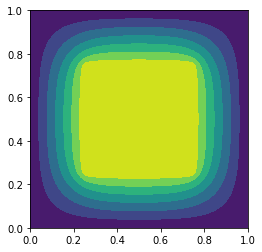

In [23]:
X,Y = meshgrid(x,y)
contourf(X,Y,Mat_V)
gca().set_aspect('equal')
show()

In [25]:
Ex,Ey = gradient(-Mat_V)

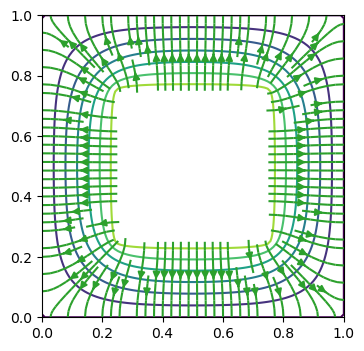

In [26]:
figure(dpi=100)
contour(X,Y,Mat_V)
streamplot(X,Y,Ey,Ex,density=1.2,color='tab:green')
gca().set_aspect('equal')
show()

In [27]:
def malla_de_mastercard(x,y,xc,yc,r,V0=1):
    # x,y son las coordenadas donde quiero encontrar la solucion
    # xc,yc son las coordenadas donde el potencial es constante
    Nx, Ny = len(x),len(y)
    Mat = zeros( (Nx,Ny) )
    for i in range(Nx):
        for j in range(Ny):
            circ1 = sqrt( (x[i]-xc[0])**2 + (y[j]-yc[0])**2 )
            circ2 = sqrt( (x[i]-xc[1])**2 + (y[j]-yc[1])**2 )
            if circ1 < r or circ2 < r:
                Mat[j,i] = V0
    return Mat

In [28]:
x , y = linspace(0,1,300) , linspace(0,1,300)
xc , yc , r = [0.4,0.6] , [0.5,0.5] , 0.1
Mat_V = malla_de_mastercard(x,y,xc,yc,r)
Mat_V_inicial = Mat_V

In [29]:
for i in range(2000):
    Mat_V = relax(Mat_V)

In [30]:
Mat_V[150,75]

0.6164469317658823

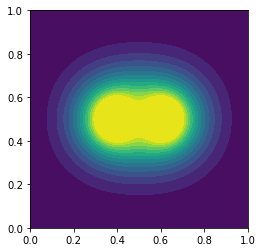

In [31]:
X,Y = meshgrid(x,y)
niveles = linspace(0,1,15)
contourf(X,Y,Mat_V,levels=niveles)
gca().set_aspect('equal')
show()

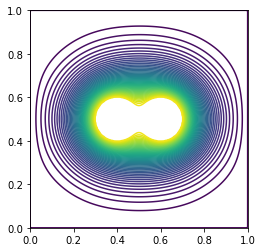

In [14]:
X,Y = meshgrid(x,y)
niveles = linspace(0,1,50)
contour(X,Y,Mat_V,levels=niveles)
gca().set_aspect('equal')
show()

In [32]:
def Mat_Jacobi(Mat,indices,error=1e-2):
    # indices debe ser un tuple
    Mat_ini = Mat
    pt_ref = Mat_ini[indices]
    Mat , N = relax(Mat) , 1
    diferencia = abs(Mat[indices] - pt_ref)
    while diferencia >= error:
        N += 1
        pt_ref = Mat[indices]
        Mat = relax(Mat)
        diferencia = abs(Mat[indices] - pt_ref)
    print('Termine con N = ',N,' iteraciones.')
    return Mat

In [36]:
x , y = linspace(0,1,100) , linspace(0,1,100)
xc , yc , r = [0.4,0.6] , [0.5,0.5] , 0.1
Mat_V = malla_de_mastercard(x,y,xc,yc,r)

In [37]:
Mat_V = Mat_Jacobi(Mat_V,(25,50),1e-9)

Termine con N =  1  iteraciones.


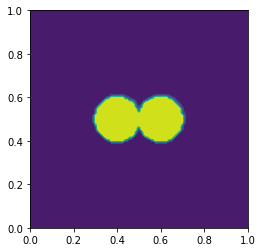

In [35]:
X,Y = meshgrid(x,y)
niveles = linspace(0,1,15)
contourf(X,Y,Mat_V)
gca().set_aspect('equal')
show()